In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [172]:
iread = pd.read_csv("Algerian_forest_fires_dataset.csv")

In [174]:
ireadCopy = iread.copy()

In [180]:
ireadCopy.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [182]:
ireadCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


## DATA CLEANING

In [184]:
## MISSING VALUES
ireadCopy[ireadCopy.isna().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


## The dataset is converted into two based on Region from  122th index we can make a new column based on columns
**1:"Bejaia Region Dataset"**

**2:"Sidi-Bel Region Dataset"**

**Add a new column**

In [208]:
ireadCopy.loc[:122,"Region"] = 0
ireadCopy.loc[122:,"Region"]=1

In [210]:
ireadCopy.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [212]:
## changing datatypes of region
ireadCopy["Region"] = ireadCopy.Region.astype(int)

In [214]:
ireadCopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 37.6+ KB


In [216]:
ireadCopy.sample(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
196,11,8,2012,40,31,15,0,94.2,22.5,46.3,16.6,22.4,21.6,fire,1
41,12,7,2012,31,75,13,0.1,75.1,7.9,27.7,1.5,9.2,0.9,not fire,0
32,3,7,2012,32,76,20,0.7,63.1,2.6,9.2,1.3,3,0.5,not fire,0
223,7,9,2012,31,62,15,0,83.3,5.8,17.7,3.8,6.4,3.2,fire,1
240,24,9,2012,26,49,6,2,61.3,11.9,28.1,0.6,11.9,0.4,not fire,1
192,7,8,2012,34,63,13,2.9,69.7,7.2,9.8,1.2,6.9,0.6,not fire,1
102,11,9,2012,30,77,21,1.8,58.5,1.9,8.4,1.1,2.4,0.3,not fire,0
118,27,9,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire,0


In [218]:
## checking the null values
ireadCopy.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [220]:
## Removing the null values
ireadCopy.dropna(inplace = True)

In [222]:
ireadCopy.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [224]:
ireadCopy.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [226]:
ireadCopy = ireadCopy.drop(124).reset_index(drop = True)

In [228]:
##  columns
ireadCopy.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [230]:
## fixing the white space of columns
ireadCopy.columns = ireadCopy.columns.str.strip()

In [232]:
ireadCopy.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

## Chaging the required Datatype into integer

In [234]:
ireadCopy[['day','month','year','Temperature','RH','Ws']] = ireadCopy[['day','month','year','Temperature','RH','Ws']].astype(int)

In [236]:
ireadCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


## Changing the required datatypes into float dataypes


In [238]:
obj = [feature for feature in ireadCopy.columns if ireadCopy[feature].dtypes == "O"]

In [240]:
for i in obj:
    if i != "Classes":
        ireadCopy[i] = ireadCopy[i].astype(float)

In [242]:
ireadCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [244]:
ireadCopy.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
10,11,6,2012,31,65,14,0.0,84.5,12.5,54.3,4.0,15.8,5.6,fire,0
232,20,9,2012,34,58,13,0.2,79.5,18.7,88.0,2.1,24.4,3.8,not fire,1
222,10,9,2012,29,74,15,1.1,59.5,4.7,8.2,0.8,4.6,0.3,not fire,1
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,0
35,6,7,2012,32,63,14,0.0,87.0,10.9,37.0,5.6,12.5,6.8,fire,0


In [246]:
## categories in class
ireadCopy.Classes.value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [248]:
ireadCopy['Classes'] = ireadCopy.Classes.str.strip()

In [250]:
ireadCopy.Classes.value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [252]:
ireadCopy["Classes"] = ireadCopy["Classes"].map({"fire":1,"not fire":0})

In [258]:
ireadCopy.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [260]:
ireadCopy.Classes.value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

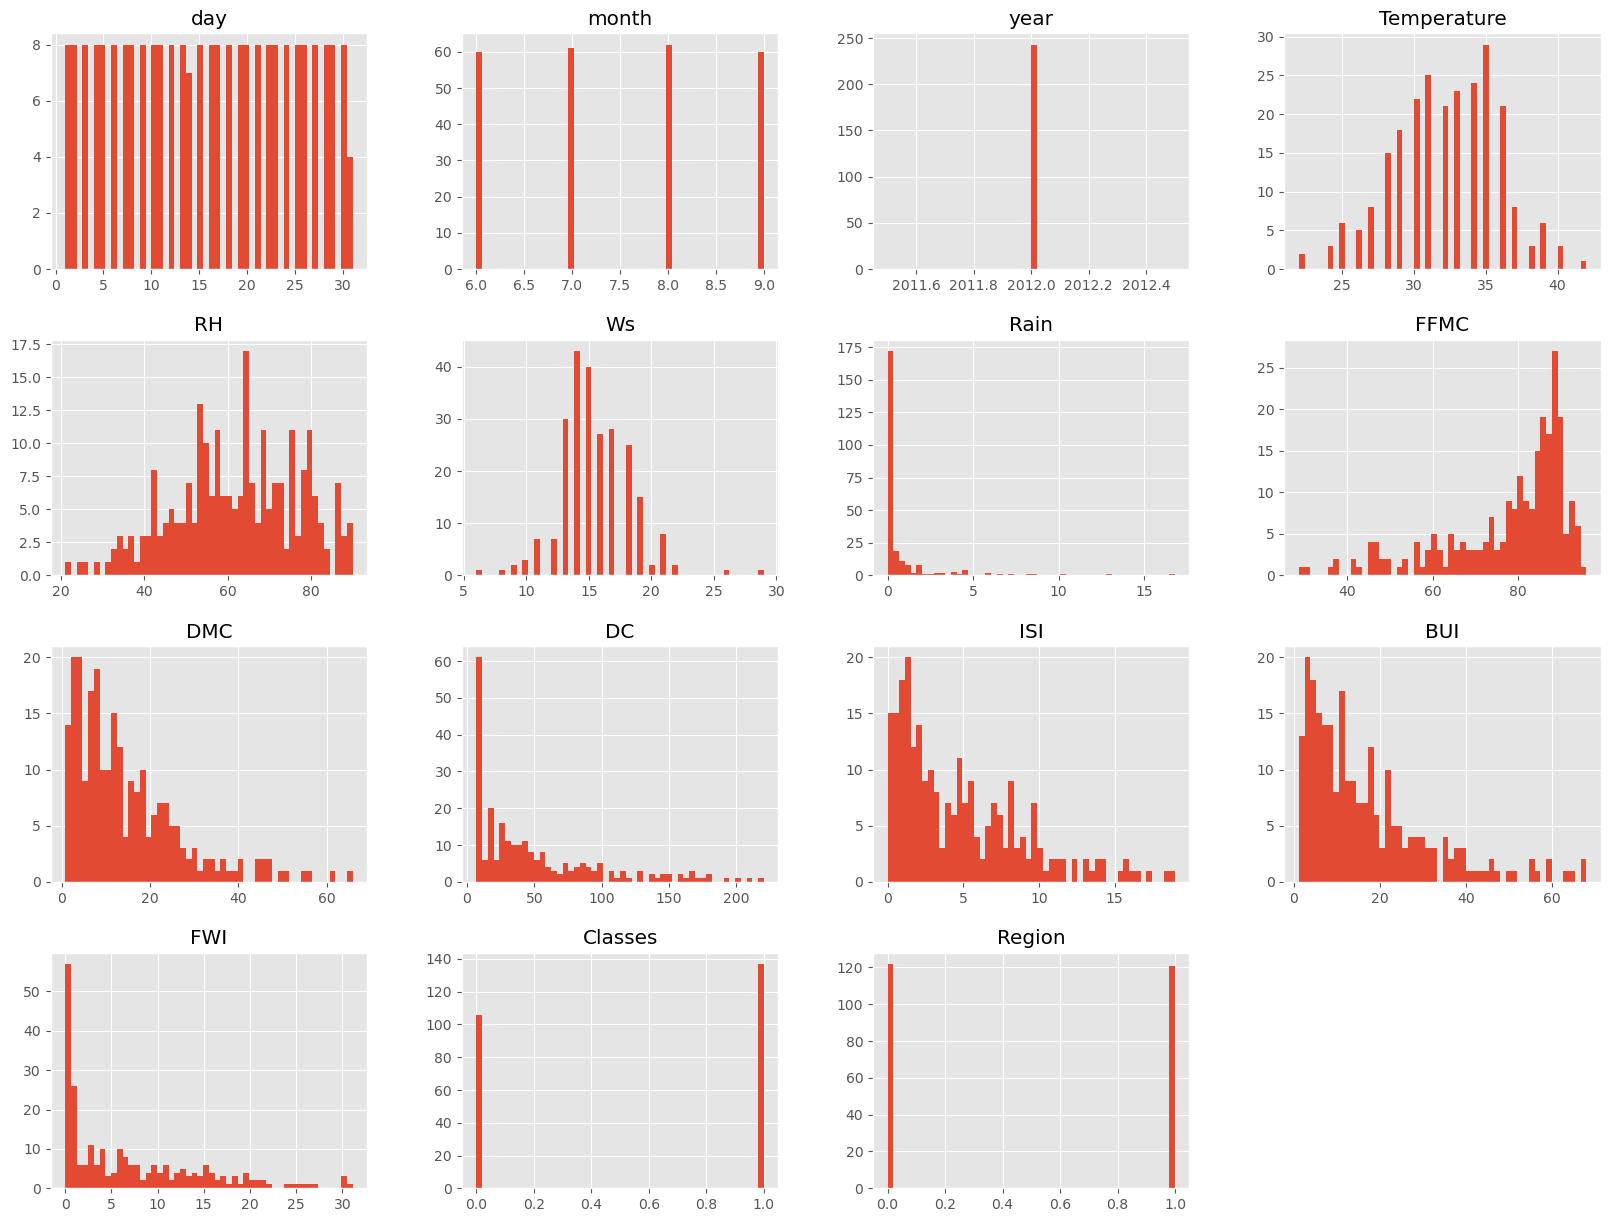

In [266]:
## plot density plot for all the features
plt.style.use('ggplot')
ireadCopy.hist(bins=50,figsize=(20,15))
plt.show()

In [274]:
## percentage for pie chart
percentage = ireadCopy["Classes"].value_counts(normalize=True)*100

In [284]:
## correlation
ireadCopy.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734


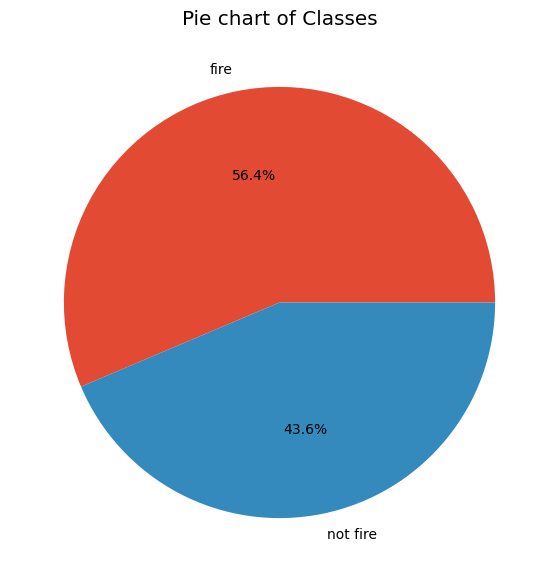

In [282]:
##Plotting the pie chart
classlabels = ["fire","not fire"]
plt.figure(figsize=(10,7))
plt.pie(percentage,labels=classlabels,autopct="%1.1f%%")
plt.title("Pie chart of Classes")
plt.show()

## Correlation


<Axes: >

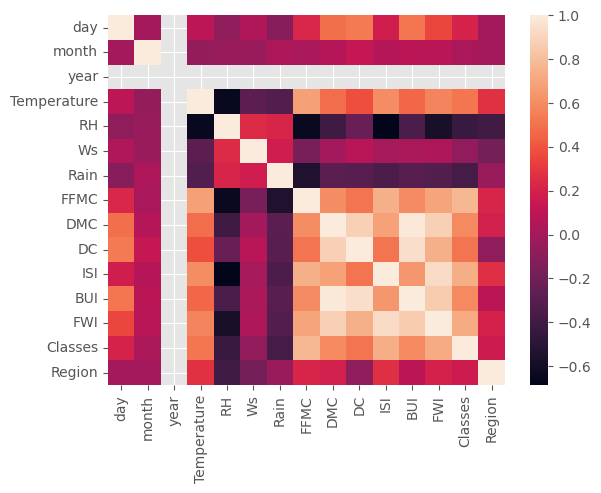

In [286]:
sns.heatmap(ireadCopy.corr())

<Axes: ylabel='FWI'>

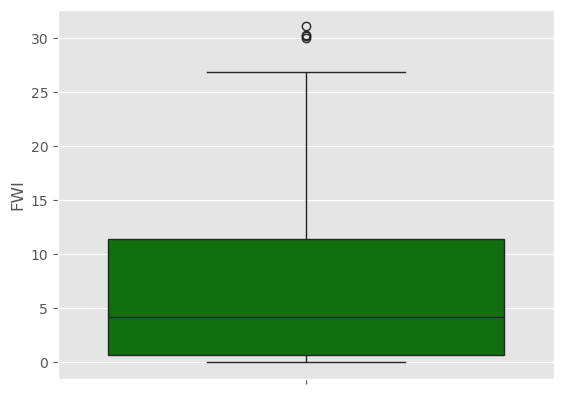

In [289]:
## box plot
sns.boxplot(ireadCopy['FWI'],color='green')

## Monthly Fire Analysis

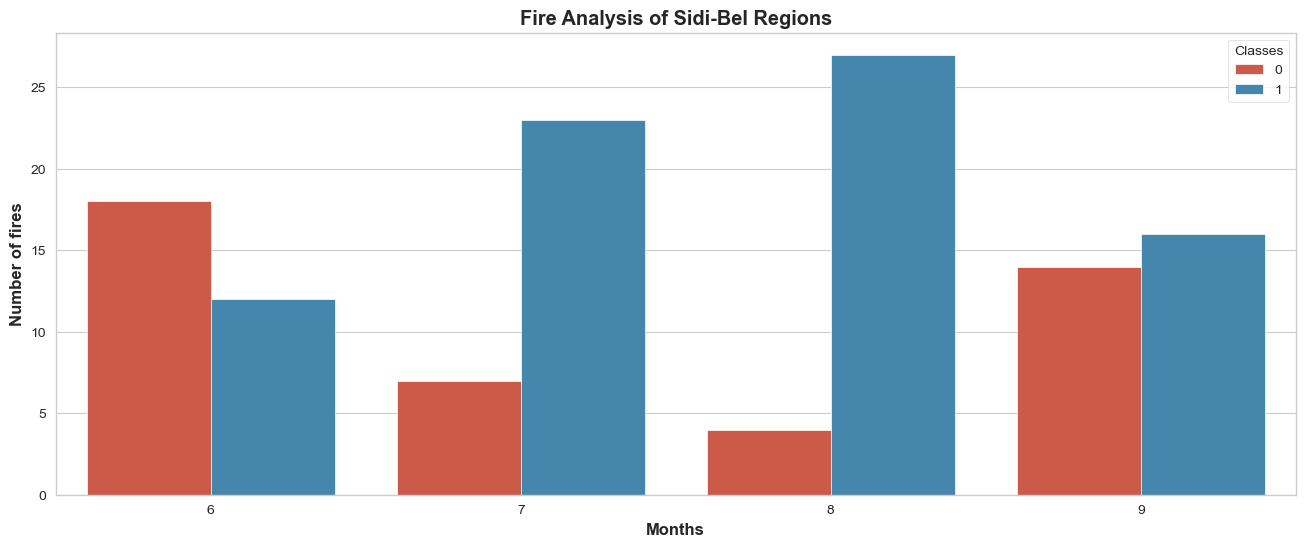

In [305]:
ireadCopytemp = ireadCopy.loc[ireadCopy["Region"]==1]
plt.subplots(figsize=(16,6))
sns.set_style('whitegrid')
sns.countplot(x="month",hue="Classes",data=ireadCopytemp)
plt.ylabel("Number of fires",weight="bold")
plt.xlabel("Months",weight='bold')
plt.title("Fire Analysis of Sidi-Bel Regions",weight='bold')
plt.show()


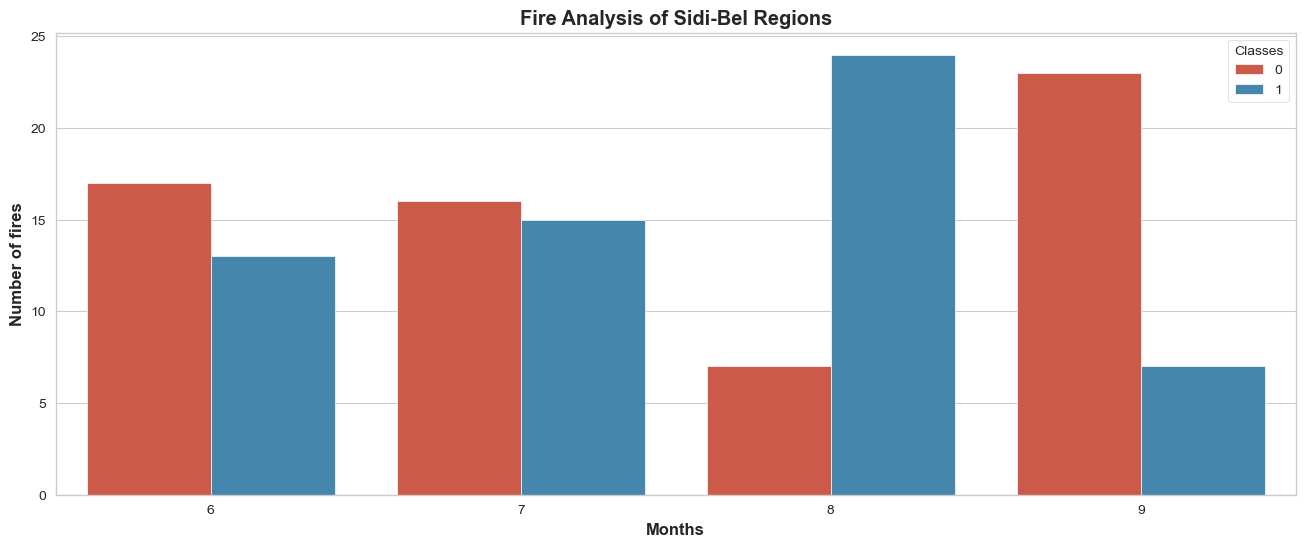

In [313]:
ireadCopytemps = ireadCopy.loc[ireadCopy["Region"]==0]
plt.subplots(figsize=(16,6))
sns.set_style('whitegrid')
sns.countplot(x="month",hue="Classes",data=ireadCopytemps)
plt.ylabel("Number of fires",weight="bold")
plt.xlabel("Months",weight='bold')
plt.title("Fire Analysis of Sidi-Bel Regions",weight='bold')
plt.show()


**Its observed that August and september had the most number of forest fires for both regions. And from the above plot of months, we can understand few things**

**Most of the fires happend in only 3 months - June,July and August.**

**Less fire was on Septermber**


In [320]:
ireadCopy.to_csv("Cleaned_dataset.csv",index = False)

#### Model  Training 

In [325]:
df = pd.read_csv("Cleaned_dataset.csv")

In [327]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [331]:
## drop month,day and yyear
df.drop(['day','month','year'],axis = 1,inplace =True)

In [333]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [339]:
## Independent and dependent feature
X = df.drop("FWI",axis=1)
y = df['FWI']

In [337]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [341]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [343]:
 ## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [345]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [347]:
## Feature Selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


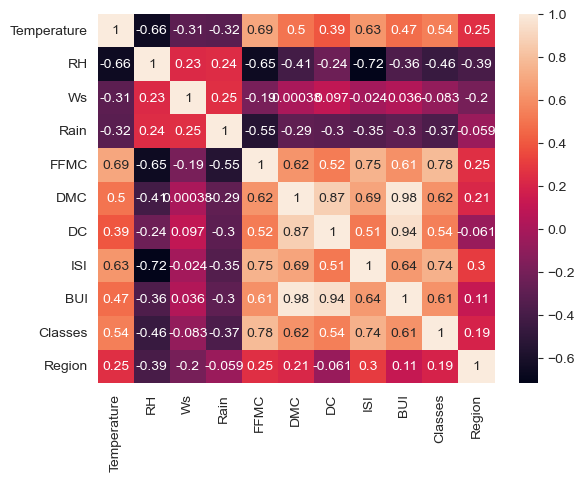

<Figure size 1000x1200 with 0 Axes>

In [357]:
sns.heatmap(X_train.corr(),annot = True)
plt.figure(figsize=(10,12))
plt.show()

In [359]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                    colname = corr_matrix.columns[i]
                    col_corr.add(colname)
    return col_corr

In [361]:
## threshold-domain expertise
corr_feature = correlation(X_train,0.85)

In [363]:
print(corr_feature)

{'DC', 'BUI'}


In [365]:
## droping feature when correlation is more than 0.85
X_train.drop(corr_feature,axis=1,inplace=True)
X_test.drop(corr_feature,axis= 1,inplace = True)
X_train.shape,X_test.shape


((182, 9), (61, 9))

## Feature Scaling and standardization

In [368]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [370]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

## Box plot to understand the effect of box ploting

Text(0.5, 1.0, 'X_train After Scaling')

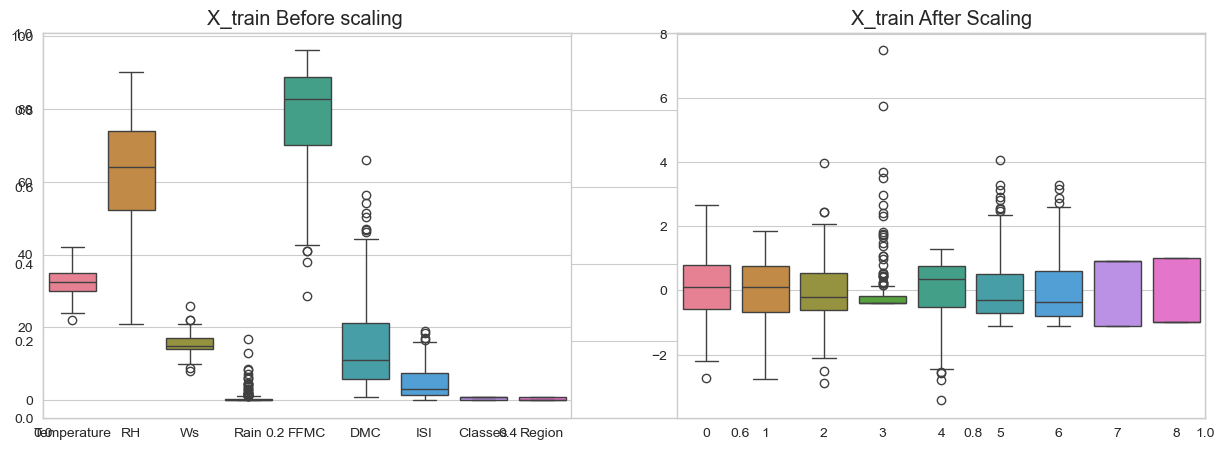

In [379]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title("X_train Before scaling ")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train After Scaling")

## Linear Regression Model


In [385]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error ,r2_score

Mean absolute error 0.5468236465249976
R2 Score 0.9847657384266951


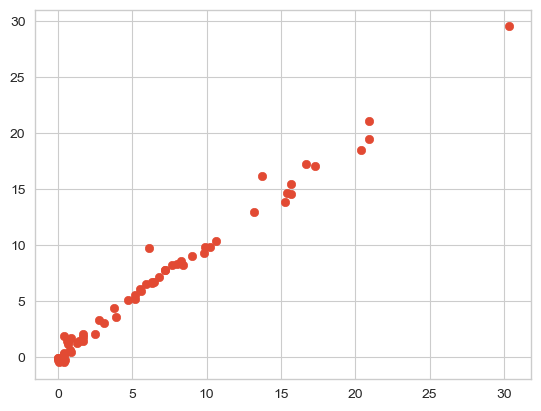

In [387]:
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)


**Lasson**

Mean absolute error 1.1331759949144085
R2 Score  0.9492020263112388


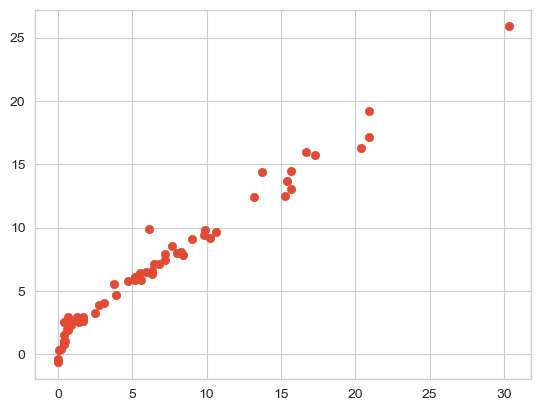

In [419]:
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_absolute_error,r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mse = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error",mse)
print("R2 Score ",score)
plt.scatter(y_test,y_pred)


## cross Validation

In [422]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

Mean absolute errror 0.6199701158263431
R2 score 0.9820946715928275


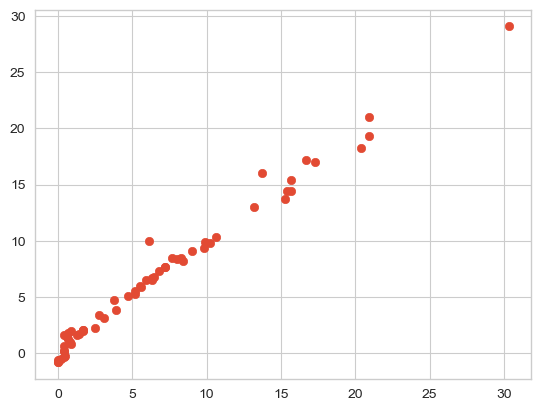

In [437]:
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute errror",mae)
print("R2 score",score)

## Ridge Regression Model

Mean_Squared_Eror 0.5642305340105693
R2_Score 0.9842993364555513


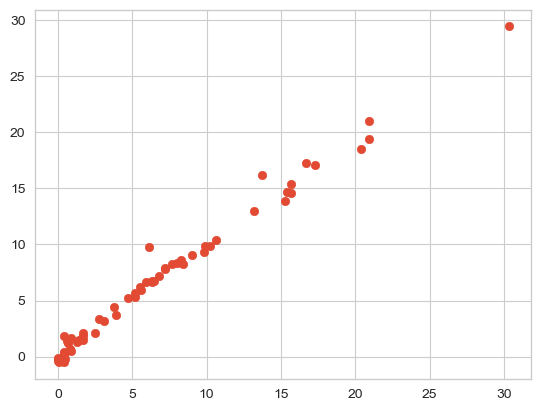

In [468]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean_Squared_Eror",mae)
print("R2_Score",score)
plt.scatter(y_test,y_pred)

## Ridge cV

Mean absolute error 0.5642305340105693
R2 Score 0.9842993364555513


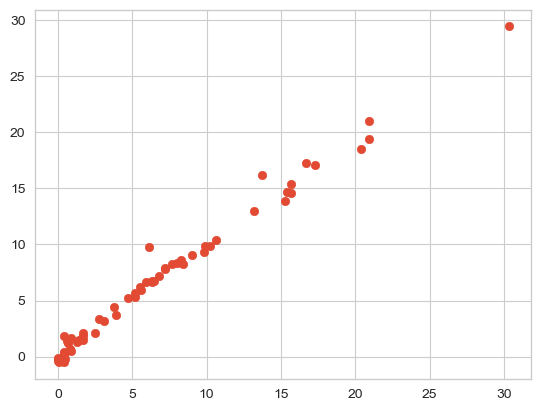

In [464]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error,r2_score
ridgesv = RidgeCV(cv=5)
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score",score)

## Elastic Net

mae 0.5642305340105693
mse 0.6949198918152067
rmse 0.8336185529456543
r2score 0.9842993364555513


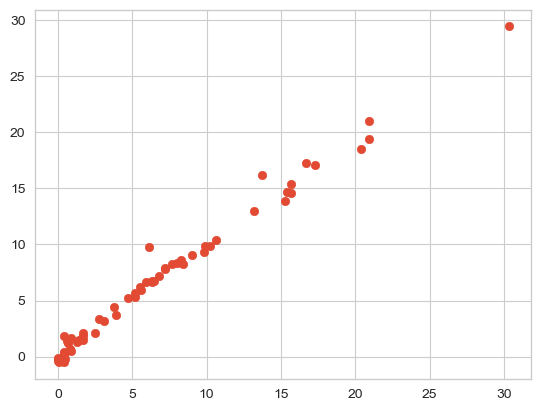

In [457]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
elastic.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2score = r2_score(y_test,y_pred)
print("mae",mae)
print("mse",mse)
print("rmse",rmse)
print("r2score",score)

## Pickle the machine Learning models,preprocessing model standardscaler

In [460]:
scaler

StandardScaler()

In [470]:
ridge

Ridge()

In [ ]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('scaler.pkl''wb'))